In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [8]:
#histogram for unlinked windows 32kb
basic_short = pd.read_csv('basic_short_all.csv')
basic_short.drop(basic_short.columns[[0, 1]], axis=1, inplace=True)
current_winner_short = pd.read_csv('current_winner_short_all.csv')
current_winner_short.drop(current_winner_short.columns[[0, 1]], axis=1, inplace=True)

In [9]:
#data with Fst without influence of sample size
basic_short_new = pd.read_csv('basic_model_newav_all.csv')
basic_short_new.drop(basic_short_new.columns[[0, 1]], axis=1, inplace=True)
current_winner_short_new = pd.read_csv('current_winner_newmean_all.csv')
current_winner_short_new.drop(current_winner_short_new.columns[[0, 1]], axis=1, inplace=True)

In [10]:
cutoff = (basic_short['Fst'].quantile(0.95), current_winner_short['Fst'].quantile(0.95))
cutoff

(0.4162647670487343, 0.19972729115012627)

(0, 0.45)

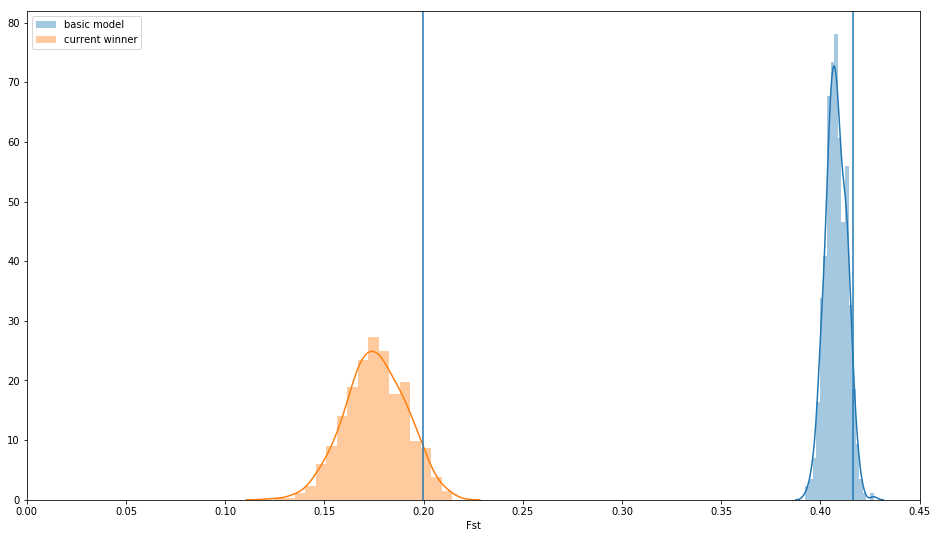

In [16]:
fig, ax = plt.subplots(figsize=(16,9))
sns.distplot(basic_short['Fst'], label='basic model', norm_hist=True) 
sns.distplot(current_winner_short['Fst'], label='current winner', norm_hist=True)
plt.legend()
plt.axvline(x=cutoff[0])
plt.axvline(x=cutoff[1])
ax.set_xlim((0, 0.45))

(0, 0.45)

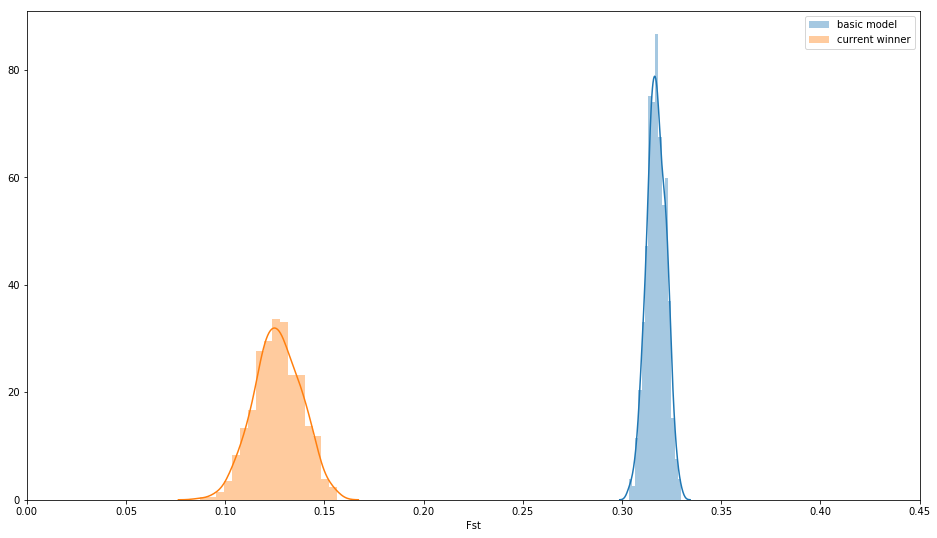

In [17]:
fig, ax = plt.subplots(figsize=(16,9))
sns.distplot(basic_short_new['Fst'], label='basic model', norm_hist=True) 
sns.distplot(current_winner_short_new['Fst'], label='current winner', norm_hist=True)
plt.legend()
ax.set_xlim((0, 0.45))

So giving within_p1, within_p2 and between pop comparisons equal weight indeed leads to lower Fst_values (because less biased towards the more numerous between_pop comparisons)

In [19]:
#Fst values from blocktools for same parameter settings but sequences of 3.2Mb
basic_model_blocks = pd.read_csv('basic.window.variant.tsv', sep='\t')
current_winner_blocks = pd.read_csv('winner.window.variant.tsv', sep='\t')
current_winner_blocks.head()

,window_id,hetA,hetB,hetAB,fixed,multiallelic,missing,pi_A,pi_B,d_xy,f_st
0,chr1_0_32000,0.014975,0.015242,0.003468,0.008766,0.0,0.0,0.018443,0.018710,0.025608,0.159145
1,chr1_6400_38400,0.014627,0.015073,0.003362,0.008500,0.0,0.0,0.017989,0.018435,0.025031,0.157697
2,chr1_12800_44800,0.014254,0.015976,0.003279,0.008618,0.0,0.0,0.017533,0.019255,0.025372,0.159446
3,chr1_19200_51200,0.014103,0.015471,0.003154,0.008766,0.0,0.0,0.017257,0.018625,0.025130,0.166899
4,chr1_25600_57600,0.013710,0.015622,0.002958,0.008710,0.0,0.0,0.016669,0.018581,0.024856,0.170214


(0, 0.3)

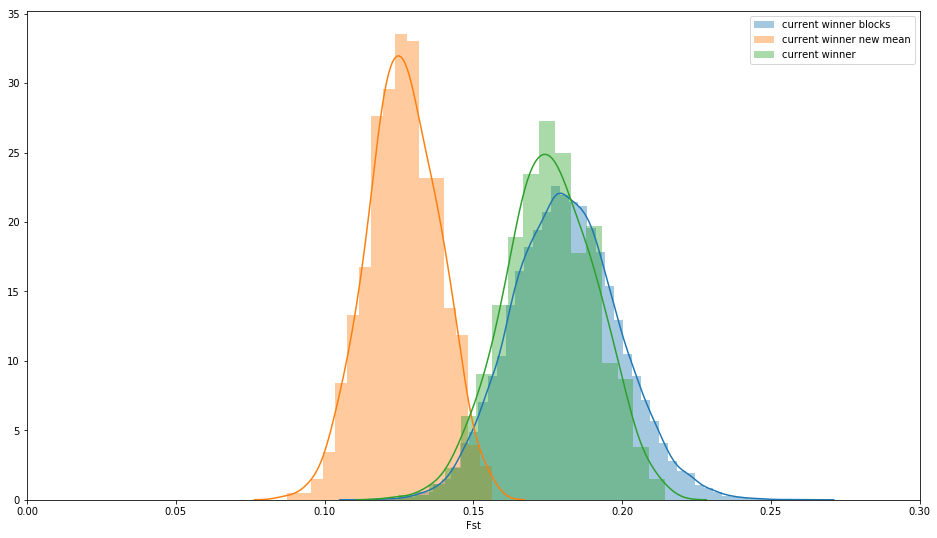

In [21]:
fig, ax = plt.subplots(figsize=(16,9))
sns.distplot(current_winner_blocks['f_st'], label='current winner blocks', norm_hist=True)
sns.distplot(current_winner_short_new['Fst'], label='current winner new mean', norm_hist=True)
sns.distplot(current_winner_short['Fst'], label='current winner', norm_hist=True)
plt.legend()
ax.set_xlim((0, 0.3))

In [29]:
#for basic model expectation
def expected_Fst(splitT, Ne):
    within = 2*Ne
    between = splitT + 2*Ne
    total = np.mean([within, between])
    return (total-within)/total

In [30]:
#compare theoretically expected value to mean Fst value for simulated sequences
(expected_Fst(splitT = 6.90789e6, Ne=2.46711e6), basic_model_blocks['f_st'].mean())

(0.41176407474101906, 0.4114637798971432)